In [14]:
import numpy as np 
import sklearn.svm
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

 Importation de la Base de données

In [18]:
os.chdir('/Users/farah/Documents/INFO/Cours_ET4/MachineLearning/ProjetIA')
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', header=0)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

target = ['DEATH_EVENT']

In [21]:
#iris_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
                 
# Extract features
#A = heart.loc[:, iris_features].values

In [23]:
target

['DEATH_EVENT']

Etablissement des matrices

In [24]:
X = np.asarray(features)
Y = np.asarray(target)
print("Le X est de dimension" , X.shape )
print("Le Y est de dimension" , Y.shape )

Le X est de dimension (12,)
Le Y est de dimension (1,)


In [25]:
A = heart.loc[:, features].values

In [26]:
B = heart.loc[:, target].values

Répartissons nos entrainements et nos tests

In [27]:
from sklearn.model_selection import train_test_split
#On prends 70% de trains et 20% de tests
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.3, random_state=42)

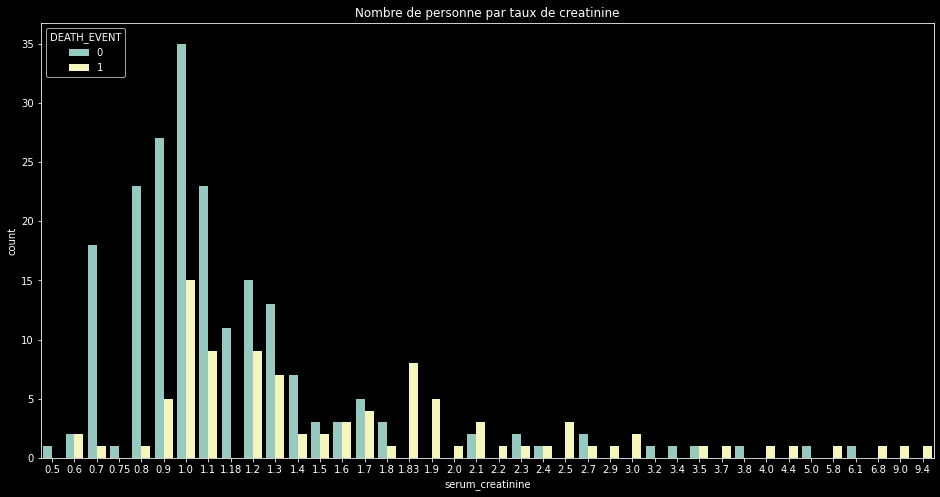

In [53]:
    import seaborn as sns
    plt.figure(figsize=(16,8))
    #plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'serum_creatinine',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.title("Nombre de personne par taux de creatinine")
    plt.show()

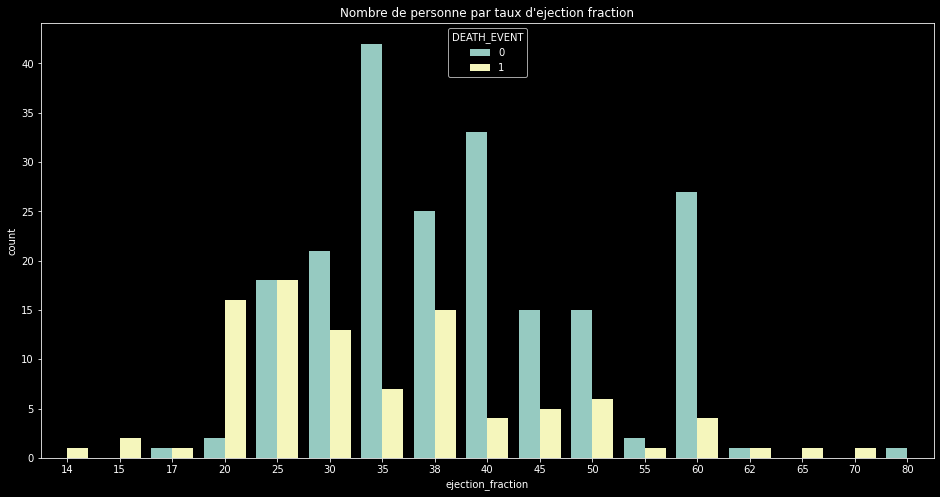

In [54]:
    import seaborn as sns
    plt.figure(figsize=(16,8))
    plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'ejection_fraction',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.title("Nombre de personne par taux d'ejection fraction")
    plt.show()

In [31]:
print("Les X_train ont maintenant 209 lignes -->", X_train.shape)

Les X_train ont maintenant 209 lignes --> (209, 12)


On effectue maintenant une SVM

In [33]:
from sklearn import svm
clf = sklearn.svm.SVC(kernel='linear', C=1)
clf.fit(X_train,Y_train)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, kernel='linear')

In [34]:
print("training score:",clf.score(X_train,Y_train))
print("test score:",clf.score(X_test,Y_test))

training score: 0.8277511961722488
test score: 0.7777777777777778


In [55]:
#from sklearn import model_selection
#scores_res = model_selection.cross_val_score(clf, A, B, cv=5)

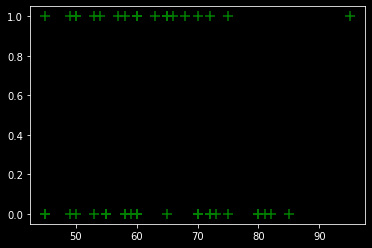

In [35]:
suppVect = clf.support_vectors_ ## TODO : recuperer les vecteurs supports, en utilisant l'objet "clf"
size=100
plt.scatter(suppVect[:,0],suppVect[:,1], c = 'green', s = size, marker='+')
## TODO: tracer aussi les points de l'ensemble de validation (en plus petits, ou autres couleur, etc)

In [36]:
features2 = ['ejection_fraction', 'serum_creatinine']

target2 = ['DEATH_EVENT'] 

In [37]:
X2 = heart.loc[:, features2].values
Y2 = heart.loc[:, target2].values

In [38]:
X2.shape, Y2.shape

((299, 2), (299, 1))

In [39]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.5, random_state=42)

In [40]:
clf_2 = sklearn.svm.SVC(kernel='linear', C=1)
clf_2.fit(X2_train,Y2_train)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, kernel='linear')

In [41]:
print("training score:",clf_2.score(X2_train,Y2_train))
print("test score:",clf_2.score(X2_test,Y2_test))

training score: 0.8053691275167785
test score: 0.62


Passons à la PCA

In [42]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(heart)
df_std

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -6.87681906e-01, -1.62950241e+00,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -6.87681906e-01, -1.60369074e+00,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         1.45416070e+00, -1.59078490e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -6.87681906e-01,  1.90669738e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         1.45416070e+00,  1.93250906e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         1.45416070e+00,  1.99703825e+00, -6.87681906e-01]])

In [46]:
df_cov_matrix = np.cov(df_std.T)
#df_cov_matrix

In [44]:
#eig_vals, eig_vecs = np.linalg.eig(heart)

LinAlgError: Last 2 dimensions of the array must be square

In [85]:
#eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])

#for i in range(len(eig_vals))]
 #   print(‘Eigenvalues in descending order:’)
#for i in eig_pairs:
 #   print(i[0])

SyntaxError: unexpected EOF while parsing (<ipython-input-85-9fe1095ec290>, line 6)

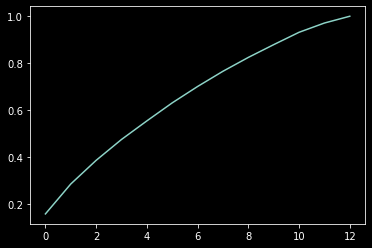

In [45]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel(‘No of components’)
#plt.ylabel(‘Cumulative explained variance’)
plt.show()

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


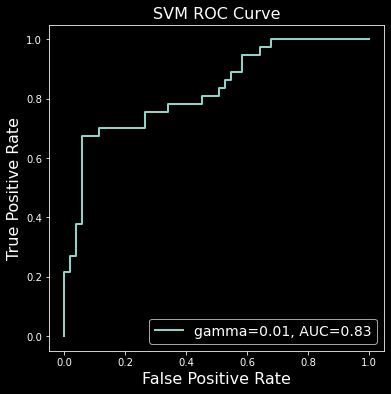

In [49]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)

Y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


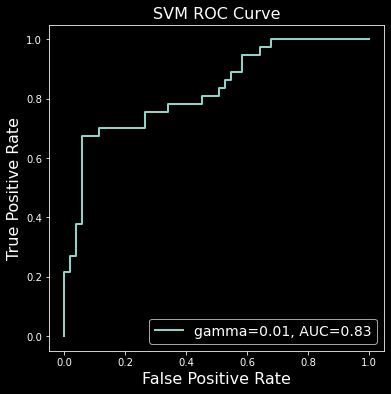

In [52]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)

y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()